In [4]:
from fastai.vision.all import *

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
root_dir = '{root path}'
path = Path(root_dir)
path.ls()

In [ ]:
fields = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   item_tfms=Resize(224),
   batch_tfms=aug_transforms())

dls = fields.dataloaders(path)

In [ ]:
learn_inf = load_learner('{model path}')

In [ ]:
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()

In [ ]:
sf = SaveFeatures(learn_inf.model)

In [ ]:
y_pos, y_true = learn_inf.get_preds(dl=dls.valid, reorder=False)
y_true = y_true.numpy()
y_pred = np.argmax(y_pos.numpy(), axis=1)
extracted_features = sf.features
valid_img_path = np.array([str(x) for x in list(dls.valid_ds.items)])

In [ ]:
extracted_features.shape, y_true.shape
list_class = dls.vocab

In [ ]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
tsne_features = tsne.fit_transform(extracted_features)

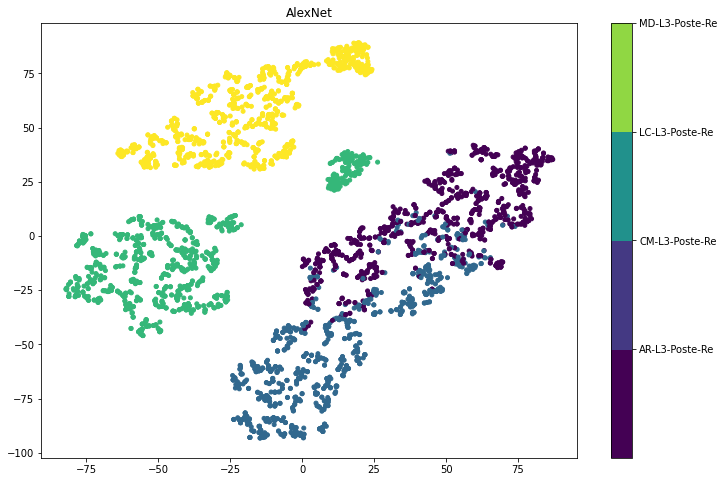

In [ ]:
fig = plt.subplots(1, figsize = (12, 8))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = y_true, s = 16, cmap = 'viridis')
plt.setp(ax, xticks = [], yticks = [])
cbar = plt.colorbar(boundaries = np.arange(5)-1)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(list_class)
plt.title('AlexNet');